In [34]:
import os
from io import StringIO, BytesIO
import IPython.display
import numpy as np
import PIL.Image
from PIL import Image
from scipy.stats import truncnorm
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import imghdr
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import savez_compressed

In [11]:
dirpath = r"\Users\brian\Documents\dsc160-final-dsc160-group18\data\albums"
thepath = r"\Users\brian\Documents\dsc160-final-dsc160-group18\data\512albums"

In [18]:
def make_thumbnail(filename, imagepath, newpath):
    #print(imagepath + "\\" + filename)
    temp = imagepath + "\\" + filename
    img = Image.open(temp)
    img = img.resize((512, 512))
    img.save(newpath + "\\" + filename)

In [21]:
directory = imagepath = os.fsencode(r"C:\\Users\brian\Documents\dsc160-final-dsc160-group18\data\albums")
for file in os.listdir(directory):
    make_thumbnail(file.decode('utf-8'), dirpath, thepath)

In [187]:
from os import listdir
dirt = r"C:\\Users\brian\Documents\dsc160-final-dsc160-group18\data\512albums"
from numpy import asarray
def load_images(path, size=(512,512)):
    temp = list()
    for filename in listdir(path):
        pixels = load_img(path + "\\" + filename, target_size=size)
        pixels = img_to_array(pixels)
        temp.append(pixels)
    return asarray(temp)

data = load_images(dirt)
filename = 'albums.npz'
savez_compressed(filename, data)

In [208]:
from numpy import load
from matplotlib import pyplot
data = load('albums.npz')
images = data['arr_0']
images.shape

(96, 512, 512, 3)

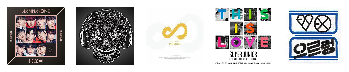

In [212]:
n_samples = 5
for i in range(n_samples):
    pyplot.subplot(2, n_samples, 1 + i)
    pyplot.axis('off')
    pyplot.imshow(images[i].astype('uint8'))
pyplot.show()

In [224]:
images

array([[[[ 69.,  64.,  60.],
         [ 69.,  64.,  60.],
         [ 69.,  64.,  60.],
         ...,
         [167., 142., 138.],
         [231., 200., 198.],
         [231., 200., 198.]],

        [[ 69.,  64.,  60.],
         [ 69.,  64.,  60.],
         [ 69.,  64.,  60.],
         ...,
         [167., 142., 138.],
         [231., 200., 198.],
         [231., 200., 198.]],

        [[ 69.,  64.,  60.],
         [ 69.,  64.,  60.],
         [ 69.,  64.,  60.],
         ...,
         [243., 218., 214.],
         [179., 149., 147.],
         [179., 149., 147.]],

        ...,

        [[164., 139., 135.],
         [164., 139., 135.],
         [245., 220., 216.],
         ...,
         [ 23.,  19.,  16.],
         [ 23.,  19.,  16.],
         [ 23.,  19.,  16.]],

        [[232., 201., 199.],
         [232., 201., 199.],
         [179., 149., 147.],
         ...,
         [ 23.,  19.,  16.],
         [ 24.,  20.,  17.],
         [ 24.,  20.,  17.]],

        [[232., 201., 199.],
       

In [3]:
import os
import glob
os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
from sklearn.utils import shuffle
import time
import cv2
import scipy
import imageio
from PIL import Image
import matplotlib.gridspec as gridspec
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers.core import Activation
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import UpSampling2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.core import Flatten
from keras.layers import Input
from keras.layers import Conv2D, Conv2DTranspose, Dropout
from keras.models import Model
from keras.optimizers import SGD, Adam, RMSprop
from keras.layers.advanced_activations import LeakyReLU
#from GAN_Nets import get_disc_normal, get_gen_normal
import matplotlib.pyplot as plt
from keras.models import load_model
import keras.backend as K
#from scipy.interpolate import spline
#K.set_image_dim_ordering('tf')


In [20]:
def norm_img(img):
    '''A function to Normalize Images.
    Input:
        img : Original image as numpy array.
    Output: Normailized Image as numpy array
    '''
    img = (img / 127.5) - 1
    return img
def denorm_img(img):
    '''A function to Denormailze, i.e. recreate image from normalized image
    Input:
        img : Normalized image as numpy array.
    Output: Original Image as numpy array
    '''
    img = (img + 1) * 127.5
    return img.astype(np.uint8) 
def sample_from_dataset(batch_size, image_shape, data_dir):
    '''Create a batch of image samples by sampling random images from a data directory.
    Resizes the image using image_shape and normalize the images.
    Input:
        batch_size : Sample size required
        image_size : Size that Image should be resized to
        data_dir : Path of directory where training images are placed.
    Output:
        sample : batch of processed images 
    '''
    sample_dim = (batch_size,) + image_shape
    sample = np.empty(sample_dim, dtype=np.float32)
    all_data_dirlist = list(glob.glob(data_dir + '*/*.jpg'))
    sample_imgs_paths = np.random.choice(all_data_dirlist,batch_size)
    for index,img_filename in enumerate(sample_imgs_paths):
        image = Image.open(img_filename)
        image = image.resize(image_shape[:-1])
        image = image.convert('RGB') 
        image = np.asarray(image)
        image = norm_img(image)
        sample[index,...] = image
    return sample

In [21]:
def generate_images(generator, save_dir):
    noise = gen_noise(batch_size,noise_shape)
    #using noise produced by np.random.uniform - the generator seems to produce same image for ANY noise - 
    #but those images (even though they are the same) are very close to the actual image - experiment with it later.
    fake_data_X = generator.predict(noise)
    print("Displaying generated images")
    plt.figure(figsize=(4,4))
    gs1 = gridspec.GridSpec(4, 4)
    gs1.update(wspace=0, hspace=0)
    rand_indices = np.random.choice(fake_data_X.shape[0],16,replace=False)
    for i in range(16):
        #plt.subplot(4, 4, i+1)
        ax1 = plt.subplot(gs1[i])
        ax1.set_aspect('equal')
        rand_index = rand_indices[i]
        image = fake_data_X[rand_index, :,:,:]
        fig = plt.imshow(denorm_img(image))
        plt.axis('off')
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
    plt.tight_layout()
    plt.savefig(save_dir+str(time.time())+"_GENERATEDimage.png",bbox_inches='tight',pad_inches=0)
    plt.show()

In [22]:
def save_img_batch(img_batch,img_save_dir):
    plt.figure(figsize=(4,4))
    gs1 = gridspec.GridSpec(4, 4)
    gs1.update(wspace=0, hspace=0)
    rand_indices = np.random.choice(img_batch.shape[0],16,replace=False)
    #print(rand_indices)
    for i in range(16):
        #plt.subplot(4, 4, i+1)
        ax1 = plt.subplot(gs1[i])
        ax1.set_aspect('equal')
        rand_index = rand_indices[i]
        image = img_batch[rand_index, :,:,:]
        fig = plt.imshow(denorm_img(image))
        plt.axis('off')
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
    plt.tight_layout()
    plt.savefig(img_save_dir,bbox_inches='tight',pad_inches=0)
    plt.show()   

In [23]:
def gen_noise(batch_size, noise_shape):
    ''' Generates a numpy vector sampled from normal distribution of shape                                (batch_size,noise_shape)
    Input:
        batch_size : size of batch
        noise_shape: shape of noise vector, normally kept as 100 
    Output:a numpy vector sampled from normal distribution of shape                                  (batch_size,noise_shape)     
    '''
    return np.random.normal(0, 1, size=(batch_size,)+noise_shape)

In [24]:
def get_gen_normal(noise_shape):
    ''' This function takes as input shape of the noise vector and creates the Keras generator    architecture.
    '''
    kernel_init = 'glorot_uniform'    
    gen_input = Input(shape = noise_shape) 
    
    # Transpose 2D conv layer 1. 
    generator = Conv2DTranspose(filters = 512, kernel_size = (4,4), strides = (1,1), padding = "valid", data_format = "channels_last", kernel_initializer = kernel_init)(gen_input)
    generator = BatchNormalization(momentum = 0.5)(generator)
    generator = LeakyReLU(0.2)(generator)
    
    # Transpose 2D conv layer 2.
    generator = Conv2DTranspose(filters = 256, kernel_size = (4,4), strides = (2,2), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(generator)
    generator = BatchNormalization(momentum = 0.5)(generator)
    generator = LeakyReLU(0.2)(generator)
    
    # Transpose 2D conv layer 3.
    generator = Conv2DTranspose(filters = 128, kernel_size = (4,4), strides = (2,2), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(generator)
    generator = BatchNormalization(momentum = 0.5)(generator)
    generator = LeakyReLU(0.2)(generator)
    
    # Transpose 2D conv layer 4.
    generator = Conv2DTranspose(filters = 64, kernel_size = (4,4), strides = (2,2), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(generator)
    generator = BatchNormalization(momentum = 0.5)(generator)
    generator = LeakyReLU(0.2)(generator)
    
    # conv 2D layer 1.
    generator = Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(generator)
    generator = BatchNormalization(momentum = 0.5)(generator)
    generator = LeakyReLU(0.2)(generator)
    
    # Final Transpose 2D conv layer 5 to generate final image. Filter size 3 for 3 image channel
    generator = Conv2DTranspose(filters = 3, kernel_size = (4,4), strides = (2,2), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(generator)
    
    # Tanh activation to get final normalized image
    generator = Activation('tanh')(generator)
    
    # defining the optimizer and compiling the generator model.
    gen_opt = Adam(lr=0.00015, beta_1=0.5)
    generator_model = Model(inputs = gen_input, output = generator)
    generator_model.compile(loss='binary_crossentropy', optimizer=gen_opt, metrics=['accuracy'])
    generator_model.summary()
    return generator_model

In [25]:
def get_disc_normal(image_shape=(64,64,3)):
    dropout_prob = 0.4
    kernel_init = 'glorot_uniform'
    dis_input = Input(shape = image_shape)
    
    # Conv layer 1:
    discriminator = Conv2D(filters = 64, kernel_size = (4,4), strides = (2,2), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(dis_input)
    discriminator = LeakyReLU(0.2)(discriminator)
    # Conv layer 2:
    discriminator = Conv2D(filters = 128, kernel_size = (4,4), strides = (2,2), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(discriminator)
    discriminator = BatchNormalization(momentum = 0.5)(discriminator)
    discriminator = LeakyReLU(0.2)(discriminator)
    # Conv layer 3:   
    discriminator = Conv2D(filters = 256, kernel_size = (4,4), strides = (2,2), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(discriminator)
    discriminator = BatchNormalization(momentum = 0.5)(discriminator)
    discriminator = LeakyReLU(0.2)(discriminator)
    # Conv layer 4:
    discriminator = Conv2D(filters = 512, kernel_size = (4,4), strides = (2,2), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(discriminator)
    discriminator = BatchNormalization(momentum = 0.5)(discriminator)
    discriminator = LeakyReLU(0.2)(discriminator)#discriminator = MaxPooling2D(pool_size=(2, 2))(discriminator)
    # Flatten
    discriminator = Flatten()(discriminator)
    # Dense Layer
    discriminator = Dense(1)(discriminator)
    # Sigmoid Activation
    discriminator = Activation('sigmoid')(discriminator)
    # Optimizer and Compiling model
    dis_opt = Adam(lr=0.0002, beta_1=0.5)
    discriminator_model = Model(inputs = dis_input, output = discriminator)
    discriminator_model.compile(loss='binary_crossentropy', optimizer=dis_opt, metrics=['accuracy'])
    discriminator_model.summary()
    return discriminator_model

In [28]:
noise_shape = (1,1,100)
num_steps = 10000
batch_size = 256
image_shape = None
img_save_dir = dirt = r"C:\\Users\brian\Documents\dsc160-final-dsc160-group18\data\output"
save_model = True
image_shape = (64, 64, 3)
data_dir = r"C:\\Users\brian\Documents\dsc160-final-dsc160-group18\data\512albums"

log_dir = img_save_dir
save_model_dir = img_save_dir

In [9]:
discriminator = get_disc_normal(image_shape)
generator = get_gen_normal(noise_shape)

C:\Users\brian\anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ac...)`


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        3136      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       131200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         5245

C:\Users\brian\anaconda3\lib\site-packages\ipykernel_launcher.py:40: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ac...)`


In [10]:
discriminator.trainable = False

# Optimizer for the GAN
opt = Adam(lr=0.00015, beta_1=0.5) #same as generator
# Input to the generator
gen_inp = Input(shape=noise_shape)

GAN_inp = generator(gen_inp)
GAN_opt = discriminator(GAN_inp)

# Final GAN
gan = Model(input = gen_inp, output = GAN_opt)
gan.compile(loss = 'binary_crossentropy', optimizer = opt, metrics=['accuracy'])

#plot_model(gan, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

C:\Users\brian\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("mo...)`
  if sys.path[0] == '':


Begin step:  0


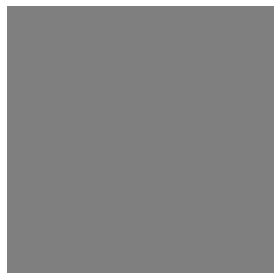

Disc: real loss: 0.748998 fake loss: 3.740421
GAN loss: 1.484342
Step 0 completed. Time took: 17 secs.
Begin step:  1
Disc: real loss: 0.749536 fake loss: 3.472787
GAN loss: 1.927217
Step 1 completed. Time took: 14 secs.
Begin step:  2
Disc: real loss: 0.467442 fake loss: 0.899229
GAN loss: 0.472070
Step 2 completed. Time took: 16 secs.
Begin step:  3
Disc: real loss: 0.523116 fake loss: 0.403203
GAN loss: 0.377214
Step 3 completed. Time took: 13 secs.
Begin step:  4
Disc: real loss: 0.374506 fake loss: 1.308710
GAN loss: 2.454080
Step 4 completed. Time took: 13 secs.
Begin step:  5
Disc: real loss: 0.771953 fake loss: 0.414619
GAN loss: 1.348653
Step 5 completed. Time took: 14 secs.
Begin step:  6
Disc: real loss: 0.428193 fake loss: 2.220613
GAN loss: 4.463977
Step 6 completed. Time took: 14 secs.
Begin step:  7
Disc: real loss: 0.628998 fake loss: 0.468391
GAN loss: 4.082671
Step 7 completed. Time took: 13 secs.
Begin step:  8
Disc: real loss: 0.456919 fake loss: 1.414919
GAN loss: 

GAN loss: 3.700073
Step 68 completed. Time took: 14 secs.
Begin step:  69
Disc: real loss: 0.838237 fake loss: 0.426820
GAN loss: 2.396234
Step 69 completed. Time took: 13 secs.
Begin step:  70
Disc: real loss: 0.412794 fake loss: 0.563926
GAN loss: 3.337109
Step 70 completed. Time took: 13 secs.
Begin step:  71
Disc: real loss: 0.568662 fake loss: 0.350021
GAN loss: 2.131725
Step 71 completed. Time took: 14 secs.
Begin step:  72
Disc: real loss: 0.424199 fake loss: 0.614790
GAN loss: 3.550968
Step 72 completed. Time took: 14 secs.
Begin step:  73
Disc: real loss: 0.529269 fake loss: 0.390163
GAN loss: 2.727373
Step 73 completed. Time took: 14 secs.
Begin step:  74
Disc: real loss: 0.449696 fake loss: 0.493447
GAN loss: 2.756763
Step 74 completed. Time took: 14 secs.
Begin step:  75
Disc: real loss: 0.515821 fake loss: 0.371441
GAN loss: 2.387512
Step 75 completed. Time took: 14 secs.
Begin step:  76
Disc: real loss: 0.391222 fake loss: 0.377885
GAN loss: 2.497667
Step 76 completed. Ti

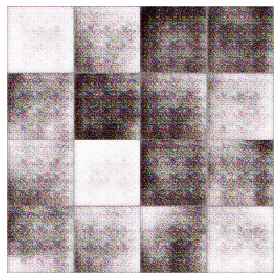

Disc: real loss: 1.240325 fake loss: 0.516709
GAN loss: 3.302860
Step 100 completed. Time took: 15 secs.
Begin step:  101
Disc: real loss: 0.425442 fake loss: 0.401734
GAN loss: 2.282610
Step 101 completed. Time took: 14 secs.
Begin step:  102
Disc: real loss: 0.380466 fake loss: 0.522271
GAN loss: 2.903229
Step 102 completed. Time took: 14 secs.
Begin step:  103
Disc: real loss: 0.425760 fake loss: 0.366521
GAN loss: 2.301096
Step 103 completed. Time took: 14 secs.
Begin step:  104
Disc: real loss: 0.412643 fake loss: 0.559353
GAN loss: 3.184742
Step 104 completed. Time took: 15 secs.
Begin step:  105
Disc: real loss: 0.444013 fake loss: 0.347207
GAN loss: 2.498212
Step 105 completed. Time took: 15 secs.
Begin step:  106
Disc: real loss: 0.360068 fake loss: 0.470915
GAN loss: 2.883233
Step 106 completed. Time took: 14 secs.
Begin step:  107
Disc: real loss: 0.384943 fake loss: 0.336146
GAN loss: 2.375164
Step 107 completed. Time took: 15 secs.
Begin step:  108
Disc: real loss: 0.38944

In [ ]:
# Use a fixed noise vector to see how the GAN Images transition through time on a fixed noise. 
fixed_noise = gen_noise(16,noise_shape)

# To keep Track of losses
avg_disc_fake_loss = []
avg_disc_real_loss = []
avg_GAN_loss = []

# We will run for num_steps iterations
for step in range(num_steps): 
    tot_step = step
    print("Begin step: ", tot_step)
    # to keep track of time per step
    step_begin_time = time.time() 
    
    # sample a batch of normalized images from the dataset
    real_data_X = sample_from_dataset(batch_size, image_shape, data_dir=data_dir)
    
    # Genearate noise to send as input to the generator
    noise = gen_noise(batch_size,noise_shape)
    
    # Use generator to create(predict) images
    fake_data_X = generator.predict(noise)
    
    # Save predicted images from the generator every 10th step
    if (tot_step % 100) == 0:
        step_num = str(tot_step).zfill(4)
        save_img_batch(fake_data_X,img_save_dir+step_num+"_image.jpg")
    
    # Create the labels for real and fake data. We don't give exact ones and zeros but add a small amount of noise. This is an important GAN training trick
    real_data_Y = np.ones(batch_size) - np.random.random_sample(batch_size)*0.2
    fake_data_Y = np.random.random_sample(batch_size)*0.2
        
    # train the discriminator using data and labels

    discriminator.trainable = True
    generator.trainable = False

    # Training Discriminator seperately on real data
    dis_metrics_real = discriminator.train_on_batch(real_data_X,real_data_Y) 
    # training Discriminator seperately on fake data
    dis_metrics_fake = discriminator.train_on_batch(fake_data_X,fake_data_Y) 
    
    print("Disc: real loss: %f fake loss: %f" % (dis_metrics_real[0], dis_metrics_fake[0]))
    
    # Save the losses to plot later
    avg_disc_fake_loss.append(dis_metrics_fake[0])
    avg_disc_real_loss.append(dis_metrics_real[0])
    
    # Train the generator using a random vector of noise and its labels (1's with noise)
    generator.trainable = True
    discriminator.trainable = False

    GAN_X = gen_noise(batch_size,noise_shape)
    GAN_Y = real_data_Y
   
    gan_metrics = gan.train_on_batch(GAN_X,GAN_Y)
    print("GAN loss: %f" % (gan_metrics[0]))
    
    # Log results by opening a file in append mode
    text_file = open(log_dir+"\\training_log.txt", "a")
    text_file.write("Step: %d Disc: real loss: %f fake loss: %f GAN loss: %f\n" % (tot_step, dis_metrics_real[0], dis_metrics_fake[0],gan_metrics[0]))
    text_file.close()

    # save GAN loss to plot later
    avg_GAN_loss.append(gan_metrics[0])
            
    end_time = time.time()
    diff_time = int(end_time - step_begin_time)
    print("Step %d completed. Time took: %s secs." % (tot_step, diff_time))
    
    # save model at every 500 steps
    if ((tot_step+1) % 500) == 0:
        print("-----------------------------------------------------------------")
        print("Average Disc_fake loss: %f" % (np.mean(avg_disc_fake_loss))) 
        print("Average Disc_real loss: %f" % (np.mean(avg_disc_real_loss))) 
        print("Average GAN loss: %f" % (np.mean(avg_GAN_loss)))
        print("-----------------------------------------------------------------")
        discriminator.trainable = False
        generator.trainable = False
        # predict on fixed_noise
        fixed_noise_generate = generator.predict(noise)
        step_num = str(tot_step).zfill(4)
        save_img_batch(fixed_noise_generate,img_save_dir+step_num+"fixed_image.png")
        generator.save(save_model_dir+str(tot_step)+"_GENERATOR_weights_and_arch.hdf5")
        discriminator.save(save_model_dir+str(tot_step)+"_DISCRIMINATOR_weights_and_arch.hdf5")

In [12]:
output_dir = r"C:\\Users\brian\Documents\dsc160-final-dsc160-group18\results\"

In [ ]:
images = []
generated_images = list(glob.glob(output_dir + '*/*.jpg'))
for x in range(0,num_steps,10):
    for filename in generated_images:
        images.append(imageio.imread(filename))
print("done")
imageio.mimsave(img_save_dir+'movie.gif', images)
from IPython.display import Image
with open(img_save_dir+'movie.gif','rb') as f:
    display(Image(data=f.read(), format='png'))

In [41]:
result_dir = r"C:\\Users\brian\Documents\dsc160-final-dsc160-group18\results\popular albums output (16)"

Displaying generated images


C:\Users\brian\anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


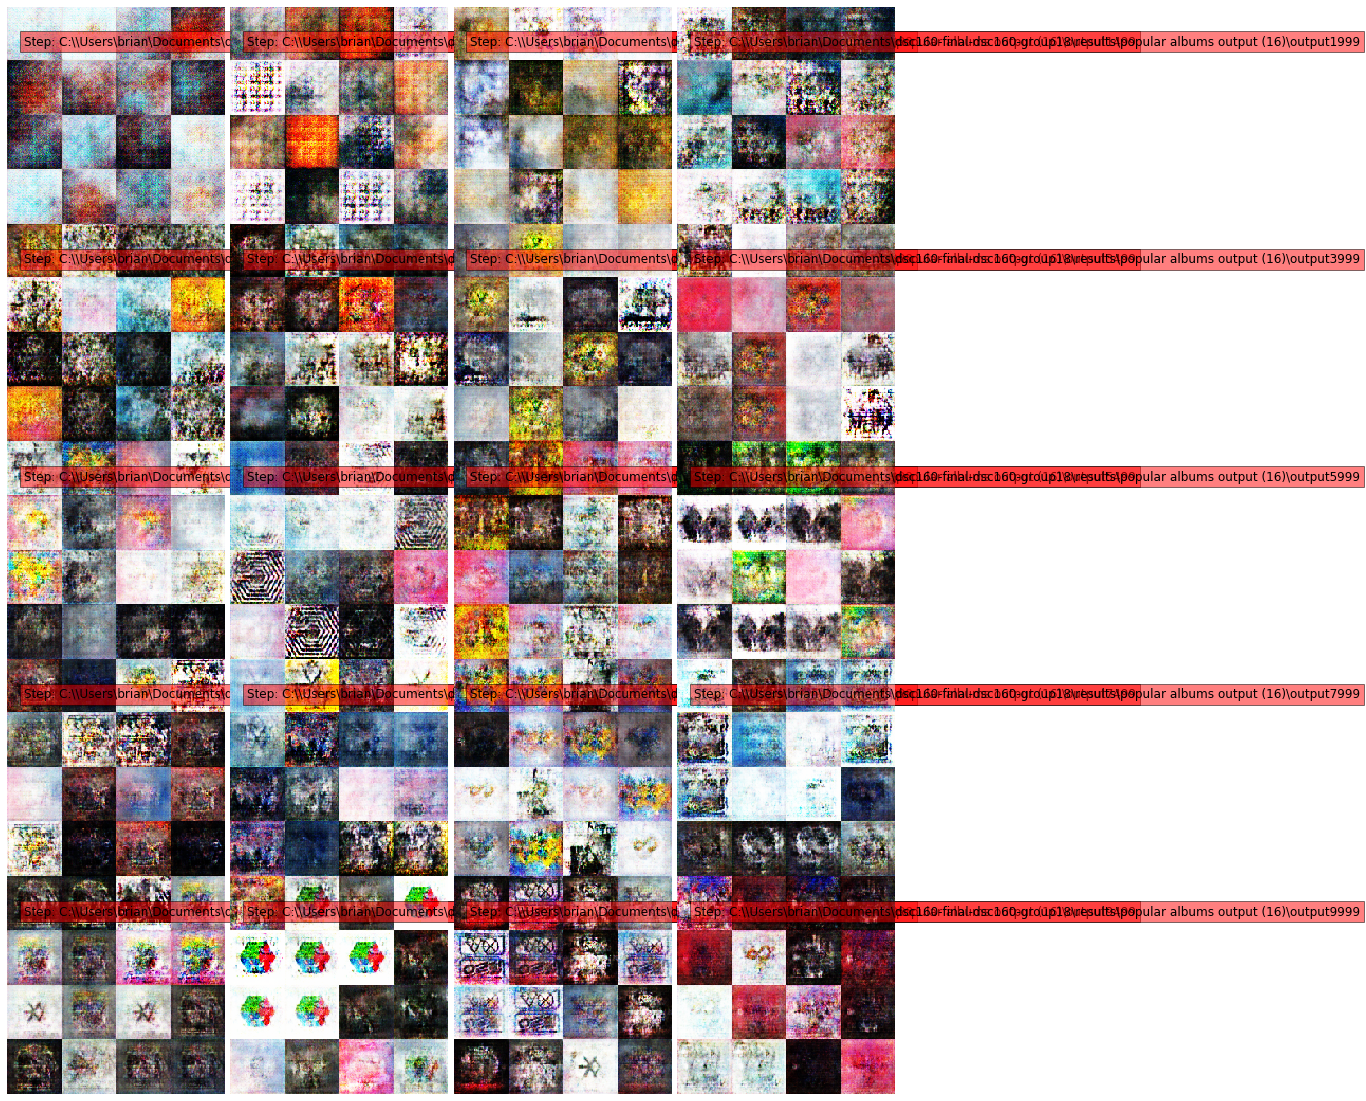

In [43]:
generated_images = [result_dir+ '\\output' +str(x).zfill(4)+"fixed_image.png" for x in range(499,num_steps,500)]
print("Displaying generated images")
# You might need to change grid size and figure size here according to num images. 
plt.figure(figsize=(16,20))
gs1 = gridspec.GridSpec(5, 4)
gs1.update(wspace=0, hspace=0)
for i,image in enumerate(generated_images):
    ax1 = plt.subplot(gs1[i])
    ax1.set_aspect('equal')
    step = image.split("fixed")[0]
    image = Image.open(image)
    fig = plt.imshow(image)
    # you might need to change some params here
    fig = plt.text(20,47,"Step: "+step,bbox=dict(facecolor='red', alpha=0.5),fontsize=12)
    plt.axis('off')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
plt.tight_layout()
plt.savefig("GENERATEDimage.png",bbox_inches='tight',pad_inches=0)
plt.show()